In [6]:
# Authors: Daichi Yoshikawa <daichi.yoshikawa@gmail.com>
# License: BSD 3 clause

from __future__ import absolute_import

import sys
sys.path.append('../../')

import pickle
import numpy as np
import dnn
from dnn.neuralnet import NeuralNetwork
from dnn.utils.nn_utils import scale_normalization

from dnn.training.optimizer import AdaGrad, AdaDelta, RMSProp
from dnn.training.random_weight import RandomWeight
from dnn.training.loss_function import LossFunction

from dnn.layers.affine import AffineLayer
from dnn.layers.activation import Activation, ActivationLayer
from dnn.layers.dropout import DropoutLayer
from dnn.layers.batch_norm import BatchNormLayer

def get_mnist():
    sys.stdout.write('Load MNIST data .')
    x = np.load('input1.npy')
    sys.stdout.write('.')
    x = np.r_[x, np.load('input2.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input3.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input4.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input5.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input6.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input7.npy')]
    x = x.astype(float)

    sys.stdout.write('.')
    y = np.load('output.npy')
    y = y.astype(float)

    sys.stdout.write(' Done.\n')

    return x, y

dtype = np.float32
model = NeuralNetwork(input_shape=(1, 28, 28), dtype=dtype)
#model = NeuralNetwork(input_shape=784, dtype=dtype)
model.add(DropoutLayer(drop_ratio=0.2))

model.add(AffineLayer(output_shape=1000, random_weight=RandomWeight.Type.he))
model.add(BatchNormLayer())
model.add(ActivationLayer(activation=Activation.Type.srrelu))
model.add(DropoutLayer(drop_ratio=0.5))

model.add(AffineLayer(output_shape=10, random_weight=RandomWeight.Type.default))
model.add(BatchNormLayer())
model.add(ActivationLayer(activation=Activation.Type.softmax))
model.compile()

model.print_config()

x, y = get_mnist()
scale_normalization(x)
x = x.reshape(-1, 1, 28, 28)

 0-th layer, (input_shape, output_shape) : ((1, 28, 28), (1, 28, 28)), input
 1-th layer, (input_shape, output_shape) : ((1, 28, 28), (1, 28, 28)), dropout
 2-th layer, (input_shape, output_shape) : ((1, 28, 28), 1000), affine
 3-th layer, (input_shape, output_shape) : (1000, 1000), batch_norm
 4-th layer, (input_shape, output_shape) : (1000, 1000), activation
 5-th layer, (input_shape, output_shape) : (1000, 1000), dropout
 6-th layer, (input_shape, output_shape) : (1000, 10), affine
 7-th layer, (input_shape, output_shape) : (10, 10), batch_norm
 8-th layer, (input_shape, output_shape) : (10, 10), activation
 9-th layer, (input_shape, output_shape) : (10, 10), output
Load MNIST data ........ Done.


100.00% epoch: 1 loss: 0.09270 acc: 0.973 loss(test): 0.10870 acc(test): 0.967
100.00% epoch: 2 loss: 0.06361 acc: 0.981 loss(test): 0.08925 acc(test): 0.974
100.00% epoch: 3 loss: 0.04619 acc: 0.986 loss(test): 0.07334 acc(test): 0.976
100.00% epoch: 4 loss: 0.03834 acc: 0.988 loss(test): 0.06912 acc(test): 0.979
100.00% epoch: 5 loss: 0.03249 acc: 0.991 loss(test): 0.06542 acc(test): 0.980
100.00% epoch: 6 loss: 0.02767 acc: 0.992 loss(test): 0.06212 acc(test): 0.981
100.00% epoch: 7 loss: 0.02341 acc: 0.993 loss(test): 0.05769 acc(test): 0.982
100.00% epoch: 8 loss: 0.02216 acc: 0.994 loss(test): 0.05878 acc(test): 0.982
100.00% epoch: 9 loss: 0.02037 acc: 0.994 loss(test): 0.05889 acc(test): 0.982
100.00% epoch:10 loss: 0.01762 acc: 0.995 loss(test): 0.05576 acc(test): 0.982


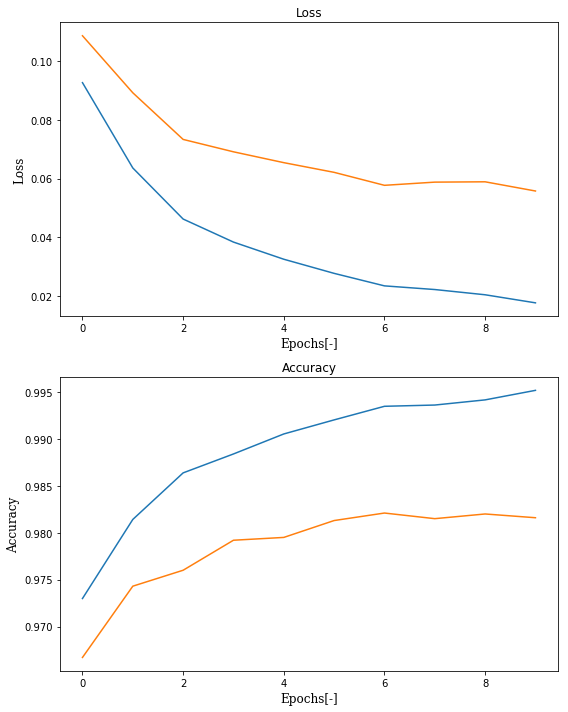

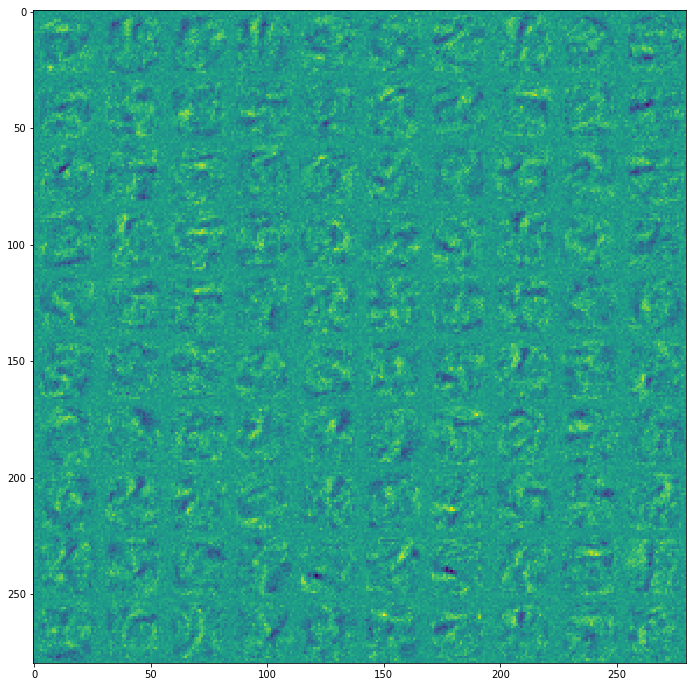

In [7]:
optimizer = AdaGrad(learning_rate=5e-2, weight_decay=1e-3, dtype=dtype)

lc = model.fit(
        x=x,
        y=y,
        epochs=10,
        batch_size=100,
        optimizer=optimizer,
        loss_function=LossFunction.Type.multinomial_cross_entropy,
        learning_curve=True,
        shuffle=True,
        shuffle_per_epoch=True,
        test_data_ratio=0.142857 # Use 60,000 for training and 10,000 for test.
)

lc.plot(figsize=(8,10), fontsize=12)
model.show_filters(0, shape=(28, 28), layout=(10, 10), figsize=(12, 12))

 0-th layer, (input_shape, output_shape) : ((1, 28, 28), (1, 28, 28)), input
 1-th layer, (input_shape, output_shape) : ((1, 28, 28), (1, 28, 28)), dropout
 2-th layer, (input_shape, output_shape) : ((1, 28, 28), 100), affine
 3-th layer, (input_shape, output_shape) : (100, 100), batch_norm
 4-th layer, (input_shape, output_shape) : (100, 100), activation
 5-th layer, (input_shape, output_shape) : (100, 100), dropout
 6-th layer, (input_shape, output_shape) : (100, 784), affine
 7-th layer, (input_shape, output_shape) : (784, 784), output
100.00% epoch: 1 loss: 10.07749
100.00% epoch: 2 loss: 9.51692
100.00% epoch: 3 loss: 9.52191
100.00% epoch: 4 loss: 9.46943
100.00% epoch: 5 loss: 9.20670
100.00% epoch: 6 loss: 9.10037
100.00% epoch: 7 loss: 9.01108
100.00% epoch: 8 loss: 9.15371
100.00% epoch: 9 loss: 8.87965
100.00% epoch:10 loss: 8.93963


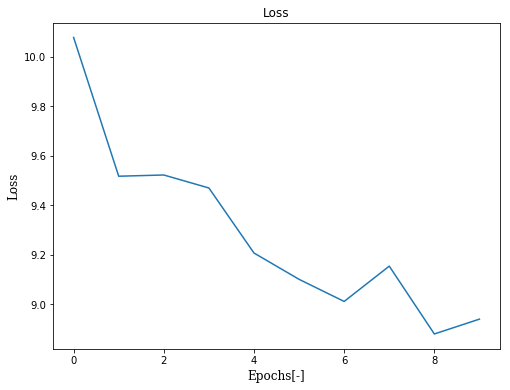

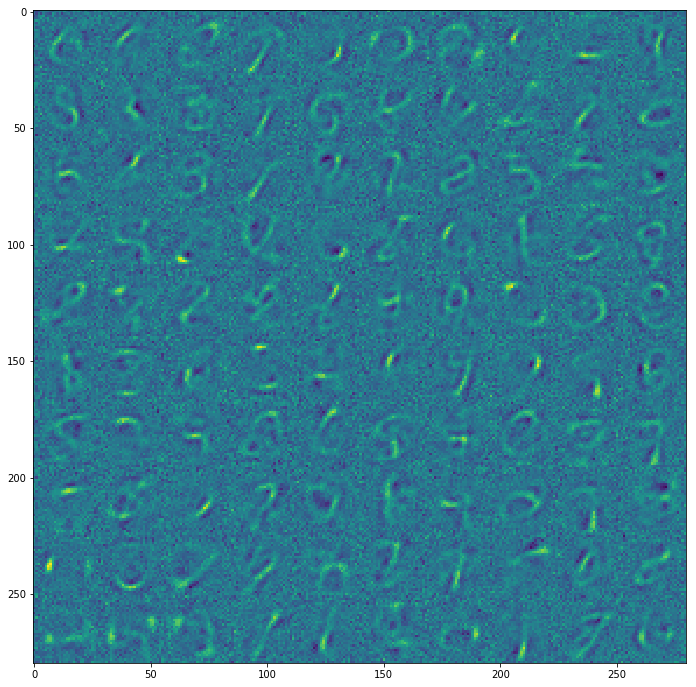

In [4]:
# Auto Encoder
ae = NeuralNetwork(input_shape=(1, 28, 28), dtype=dtype)
ae.add(DropoutLayer(drop_ratio=0.2))

ae.add(AffineLayer(output_shape=100, random_weight=RandomWeight.Type.he))
ae.add(BatchNormLayer())
ae.add(ActivationLayer(activation=Activation.Type.srrelu))
ae.add(DropoutLayer(drop_ratio=0.5))

ae.add(AffineLayer(output_shape=784, random_weight=RandomWeight.Type.he))
#ae.add(BatchNormLayer())
#ae.add(ActivationLayer(activation=Activation.Type.srrelu))
ae.compile()

ae.print_config()

optimizer = AdaGrad(learning_rate=3e-2, weight_decay=1e-3, dtype=dtype)

x = x.reshape(-1, 1, 28, 28)
y = x.reshape(-1, 784)

lc2 = ae.fit(
        x=x,
        y=y,
        epochs=10,
        batch_size=100,
        optimizer=optimizer,
        loss_function=LossFunction.Type.squared_error,
        learning_curve=True,
        shuffle=True,
        shuffle_per_epoch=True,
        test_data_ratio=0.
)

lc2.plot(figsize=(8, 6), fontsize=12)
ae.show_filters(0, shape=(28, 28), layout=(10, 10), figsize=(12, 12))